# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data.drop(columns = ["id"], inplace = True)
total_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# Obtener las dimensiones
total_data.shape

(48895, 15)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

Se puede observar arriba que algunas columnas contienen valores NaN, siendo "last_review" y "reviews_per_month" las que más.

Asimismo, nos informa de lo siguiente:
- Hay 8 características categóricas (id, name,
host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365).

- Y 8 características numéricas (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count).

In [4]:
#Contar el número de duplicados

print(f"El número total de repetidos en la columna Name es: {total_data['name'].duplicated().sum()}")
print(f"El número total de repetidos en la columna Host_id es: {total_data['host_id'].duplicated().sum()}")

El número total de repetidos en la columna Name es: 989
El número total de repetidos en la columna Host_id es: 11438


Hay varios duplicados en el nombre porque puede coincidir que algunas personas asignen el mismo título al anuncio.
En el caso de host_id se debe a que varios propietarios tienen más de una vivienda.

In [ ]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(48895, 15)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Eliminar información irrelevante

total_data.drop(["name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


/tmp/ipykernel_629/1641109454.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_629/1641109454.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


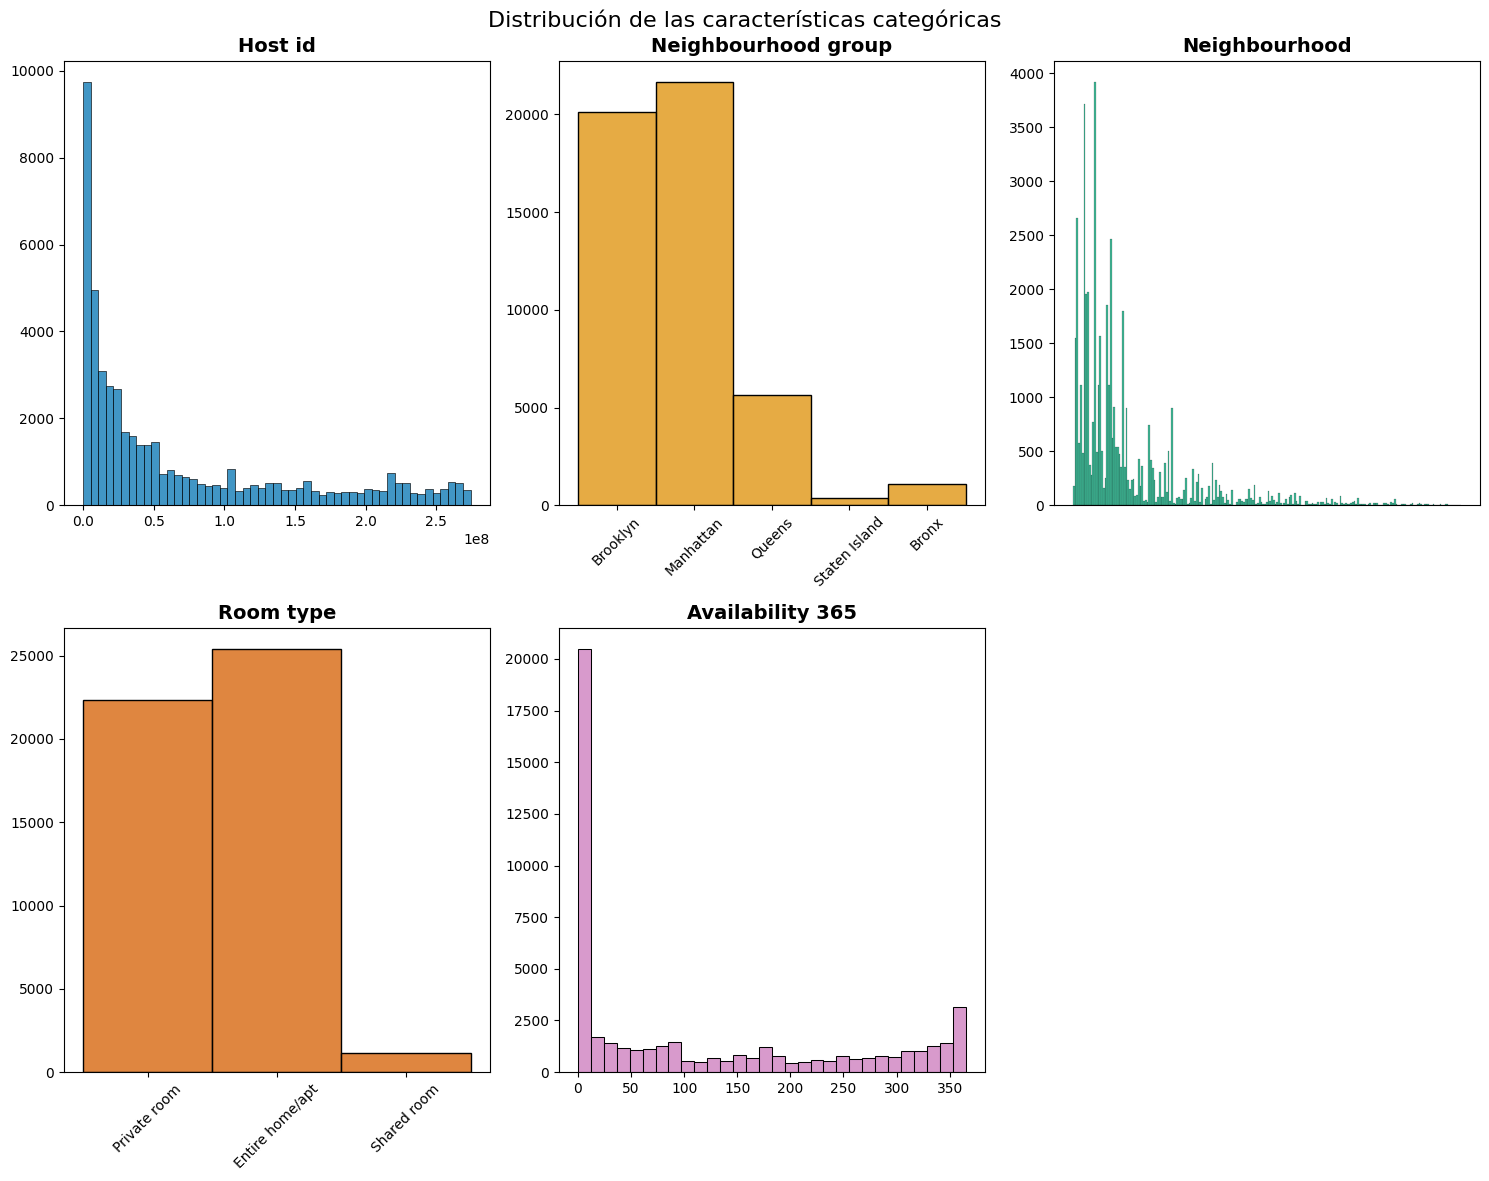

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle("Distribución de las características categóricas", fontsize=16)

categorias = [
    ("host_id", 0, 0),
    ("neighbourhood_group", 0, 1),
    ("neighbourhood", 0, 2),
    ("room_type", 1, 0),
    ("availability_365", 1, 1),
]
colores = sns.color_palette("colorblind")

for i, (col, row, col_pos) in enumerate(categorias):
    ax = axis[row, col_pos]
    sns.histplot(data=total_data, x=col, ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=14, fontweight='bold')
    
    if col in ["neighbourhood_group", "room_type"]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    if col == "neighbourhood":
        ax.set_xticks([])

fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()

Se puede observar lo siguiente:

- Host_id: hay muchos propietarios con muchas habitaciones en alquiler.
- Neighbourhood_group: aparecen cinco areas: Brooklyn, Manhattan, Queens, Staten Island y el Bronx, siendo las dos primeras las que más viviendas para alquilar hay.
- Neighbourhood: se ve una gran diferencia de ciertas zonas frente a otras.
- Room_type: el tipo de vivienda que predomina es el apartamento entero, seguido de las habitaciones privadas y por último, las habitaciones compartidas.
- Availability_365: la mayoría tiene una disponibilidad de 365 días, pero falta información por el gran número de NaN.

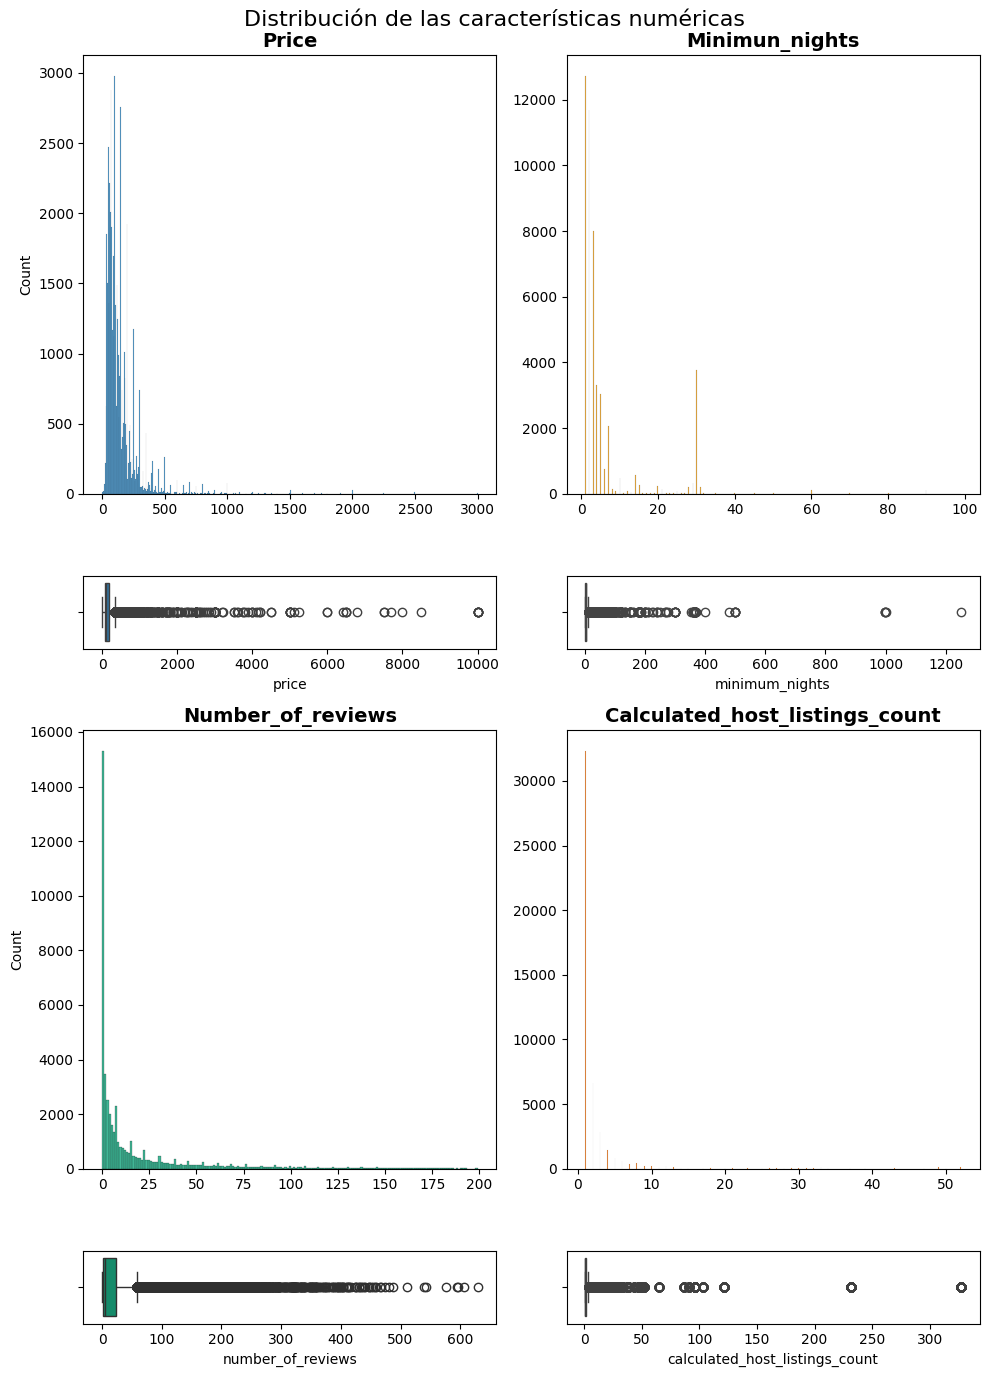

In [8]:
#Analisis con histogramas y boxplot de las características numéricas

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = total_data[total_data["price"] < 3000], x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data[total_data["minimum_nights"] < 100], x = "minimum_nights", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[2, 0], data = total_data[total_data["number_of_reviews"] < 200], x = "number_of_reviews", color=sns.color_palette("colorblind")[2]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[2,1], data = total_data[total_data["calculated_host_listings_count"] < 60], x = "calculated_host_listings_count", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count", color=sns.color_palette("colorblind")[3])

axis[0, 0].set_title("Price", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Minimun_nights", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Number_of_reviews", fontsize=14, fontweight='bold')
axis[2, 1].set_title("Calculated_host_listings_count", fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

Se puede observar lo siguiente:

- Price: los precios de la mayoría de los AirBnb rondan de los 100 a los 500.
- Minimum_nights: la estancia mínima está entre 5 a 30 noches, pero falta información por el alto número de NaN.
- Number_of_reviews: igual que en el caso anterior, no hay mucha información. Pero se ve que la mayoría tiene pocas opiniones de usuarios.
- Calculated_host_listings_count: no hay muchos datos sobre esta columna.

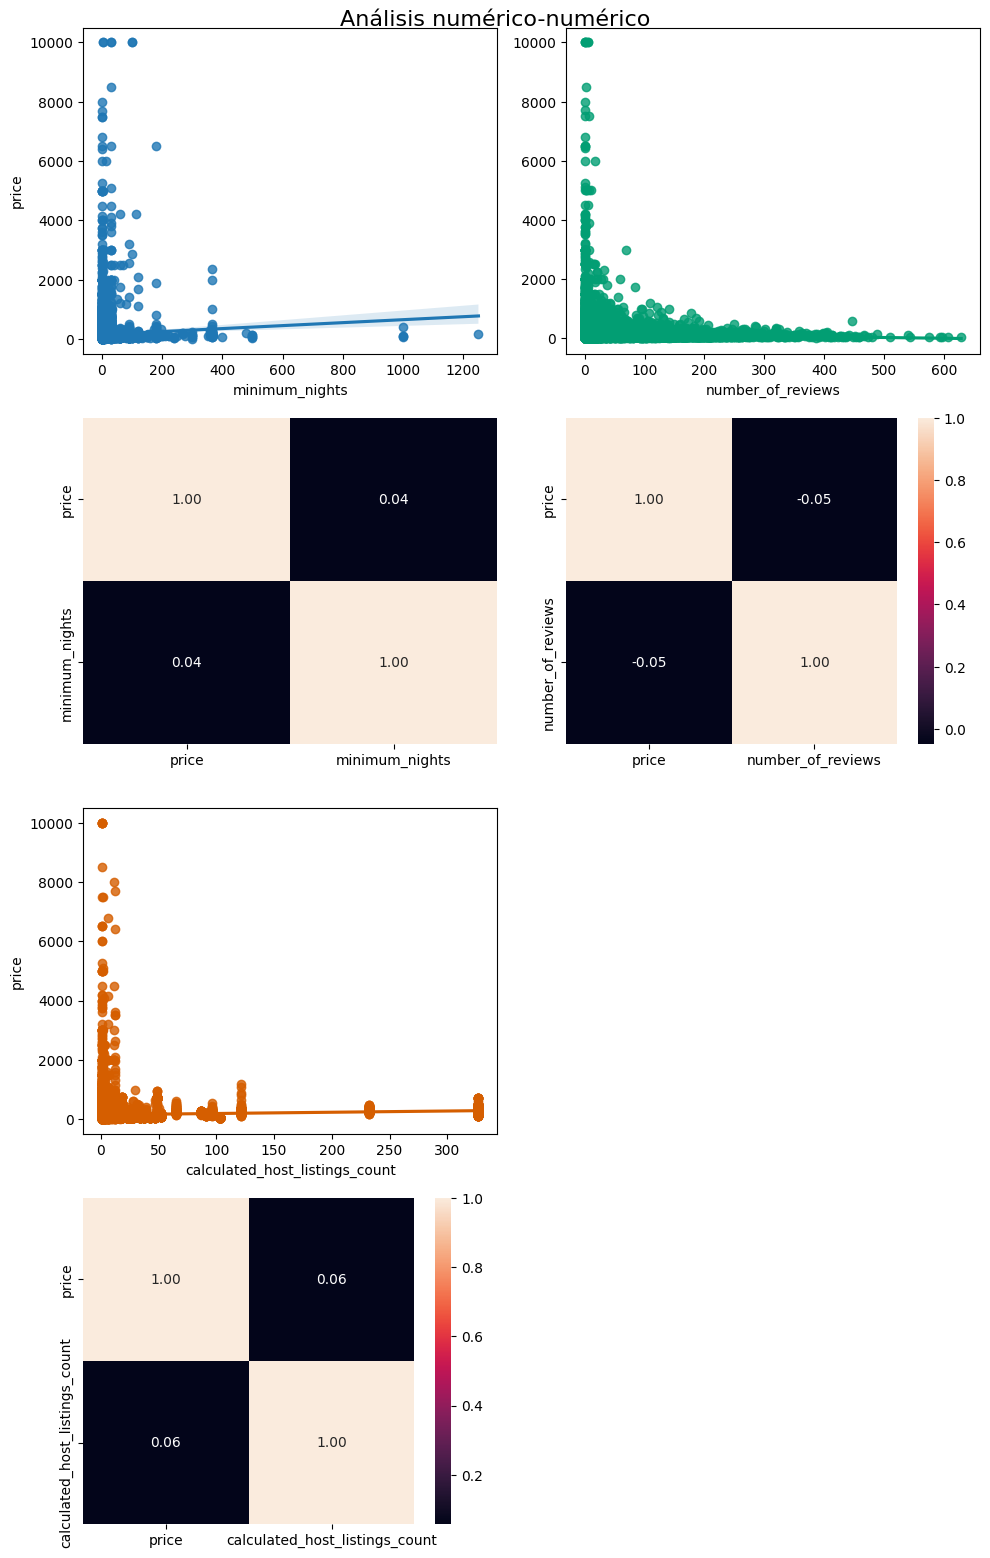

In [9]:
#Analisis de varias variables

fig, axis = plt.subplots(4, 2, figsize = (10, 16))
fig.suptitle("Análisis numérico-numérico", fontsize=16)

 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price", color=sns.color_palette("colorblind")[3])
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

Después de ver los gráficos anteriores, se puede concluir que en ambos caso no existe relación entre el precio y el número mínimo de noches, y el número de opiniones y el precio.

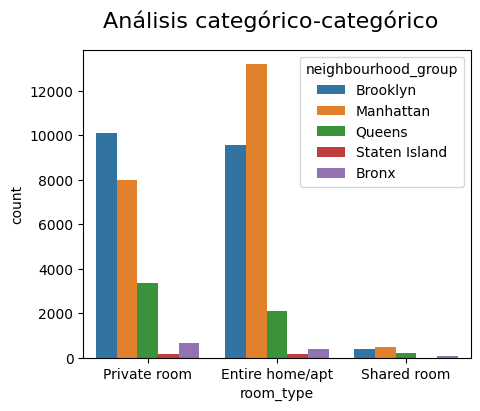

In [10]:
#Analisis de varias variables, pt.2

fig, axis = plt.subplots(figsize = (5, 4))
fig.suptitle("Análisis categórico-categórico", fontsize=16)

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

plt.show()

De la gráfica anterior podemos deducir lo siguiente:

- Manhattan es el vecindario donde más apartamentos enteros hay para alquilar.
- Brooklyn es el segundo barrio en el que más se puede alquilar, sin embargo, predominan las habitaciones privadas.
- Queens y el Bronx son los siguientes grupos, y el tipo de habitación que destaca es el mismo que Brooklyn.
- Staten Island apenas tiene visibilización, por lo que el alquiler en esta zona no es muy común. 

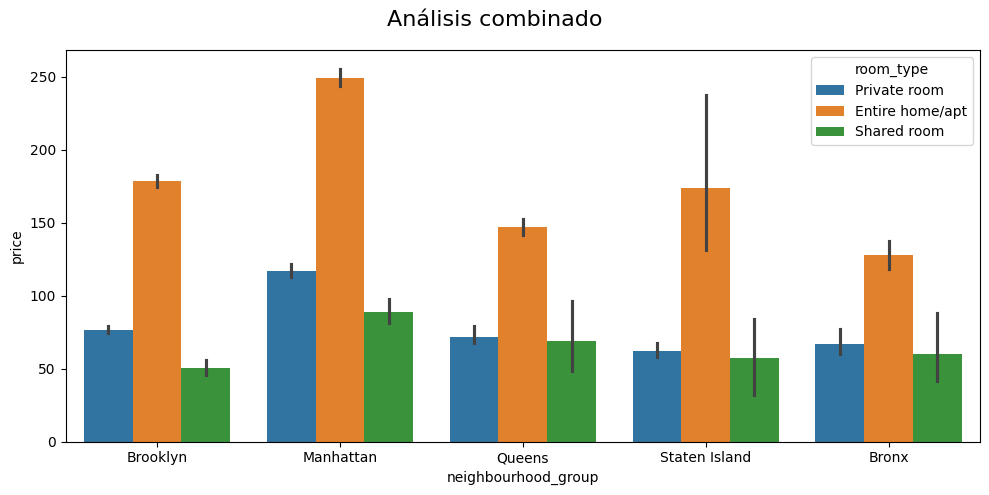

In [11]:
#Análisis combinando varias variables

fig, axis = plt.subplots(figsize = (10, 5))
fig.suptitle("Análisis combinado", fontsize=16)

sns.barplot(data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.tight_layout()

plt.show()

De la comparativa entre el precio, el vecindario y el tipo de habitación se puede observar:

- Manhattan tiene los precios más altos: En general, Manhattan muestra los precios promedio más altos, especialmente para la categoría de Entire home. Por lo que alojarse en una casa completa aquí es más caro que en otras áreas.

- Los precios más bajos en el Bronx y Staten Island: tienen los precios promedio más bajos para los tres tipos de alojamiento. Esto indica que estos son los lugares más económicos para quedarse.

- Diferencias de precio según tipo de alojamiento:

    - Entire home/apt es el tipo de alojamiento más caro en todas las áreas, destacando especialmente en Manhattan.
    - Private room es más asequible que el anterior, pero sigue siendo superior a  Shared room en todas las zonas.
    - Shared room es el tipo de alojamiento más económico en cada zona, destacando el Bronx y Staten Island.

En general, el gráfico sugiere que la zona y el tipo de alojamiento son factores importantes que afectan el precio de hospedaje en Nueva York.


In [12]:
import json

factorize = pd.factorize(total_data["neighbourhood_group"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_neighbourhood_group.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["neighbourhood_group_n"] = factorize[0]

factorize = pd.factorize(total_data["neighbourhood"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_neighbourhood.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["neighbourhood_n"] = factorize[0]


factorize = pd.factorize(total_data["room_type"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_room_type.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["room_type_n"] = factorize[0]

In [13]:
import json

with open("transform_neighbourhood_group.json", "r") as f:
  neighbourhood_group_dict = json.load(f)

with open("transform_neighbourhood.json", "r") as f:
  neighbourhood_dict = json.load(f)

with open("transform_room_type.json", "r") as f:
  room_type_dict = json.load(f)

total_data["neighbourhood_group_n"] = total_data["neighbourhood_group"].apply(lambda x: neighbourhood_group_dict.get(x))
total_data["neighbourhood_n"] = total_data["neighbourhood"].apply(lambda x: neighbourhood_dict.get(x))
total_data["room_type_n"] = total_data["room_type"].apply(lambda x: room_type_dict.get(x))


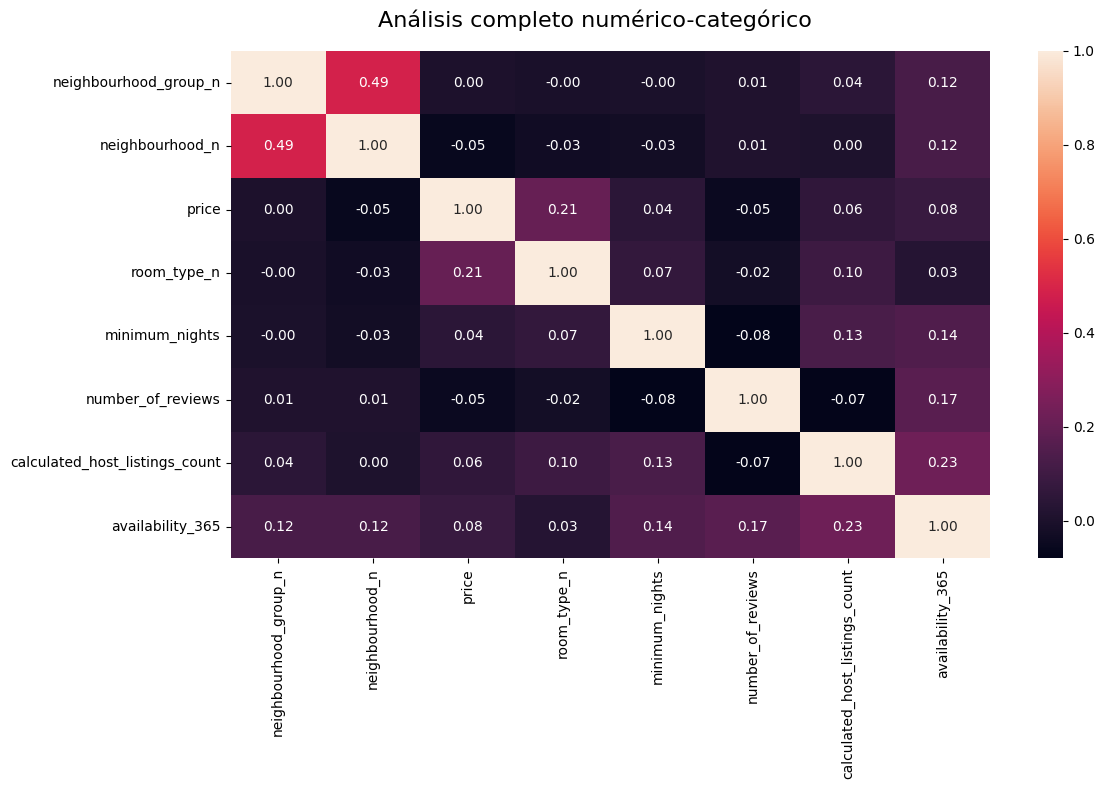

In [14]:
fig, axis = plt.subplots(figsize = (12, 8))
fig.suptitle("Análisis completo numérico-categórico", fontsize=16)

sns.heatmap(total_data[["neighbourhood_group_n", "neighbourhood_n", "price", "room_type_n", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis entre todas las categorías es:

- Los anfitriones con más listados tienden a tener mayor disponibilidad.
- Dependiendo del vecindario, los precios varían.

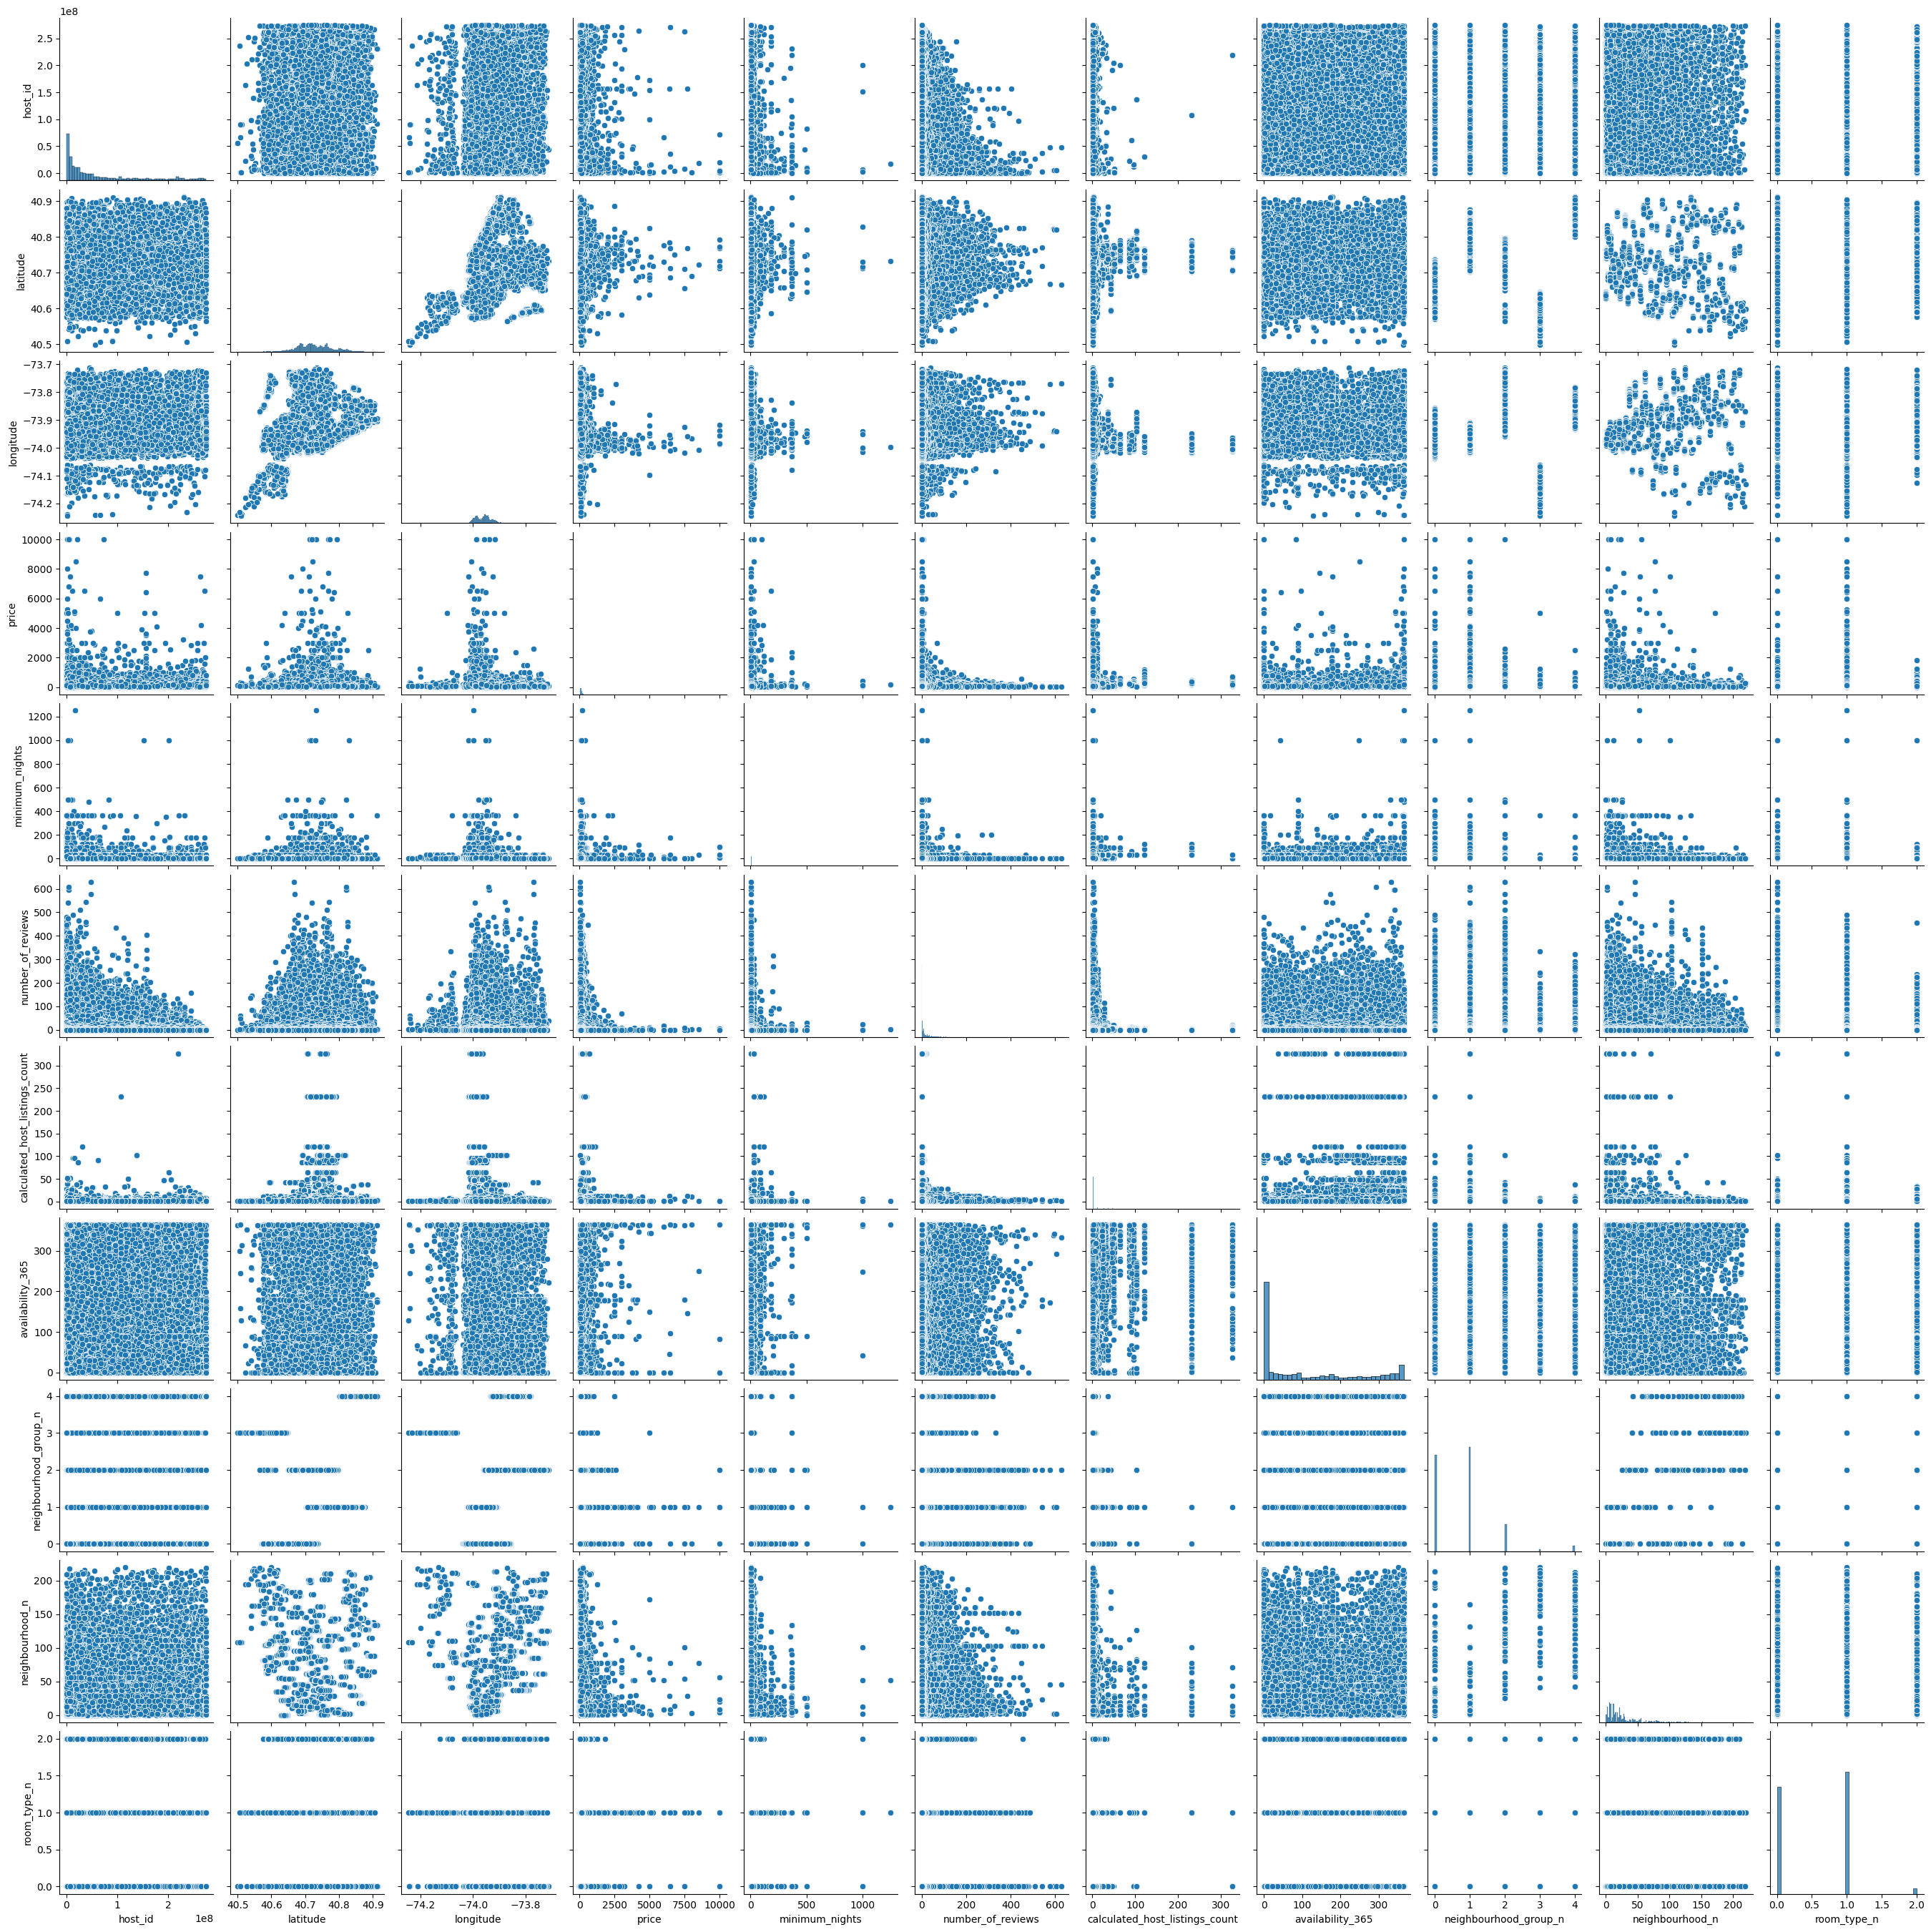

In [15]:
#Análisis de todos los datos a la vez
fig.suptitle("Análisis de todos los datos", fontsize=16)
sns.pairplot(data = total_data)

In [16]:
#Análisis de outliers
total_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.786911,29.888782,0.567113
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.844386,34.676634,0.541249
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.500000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,19.000000,1.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,37.000000,1.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,220.000000,2.000000


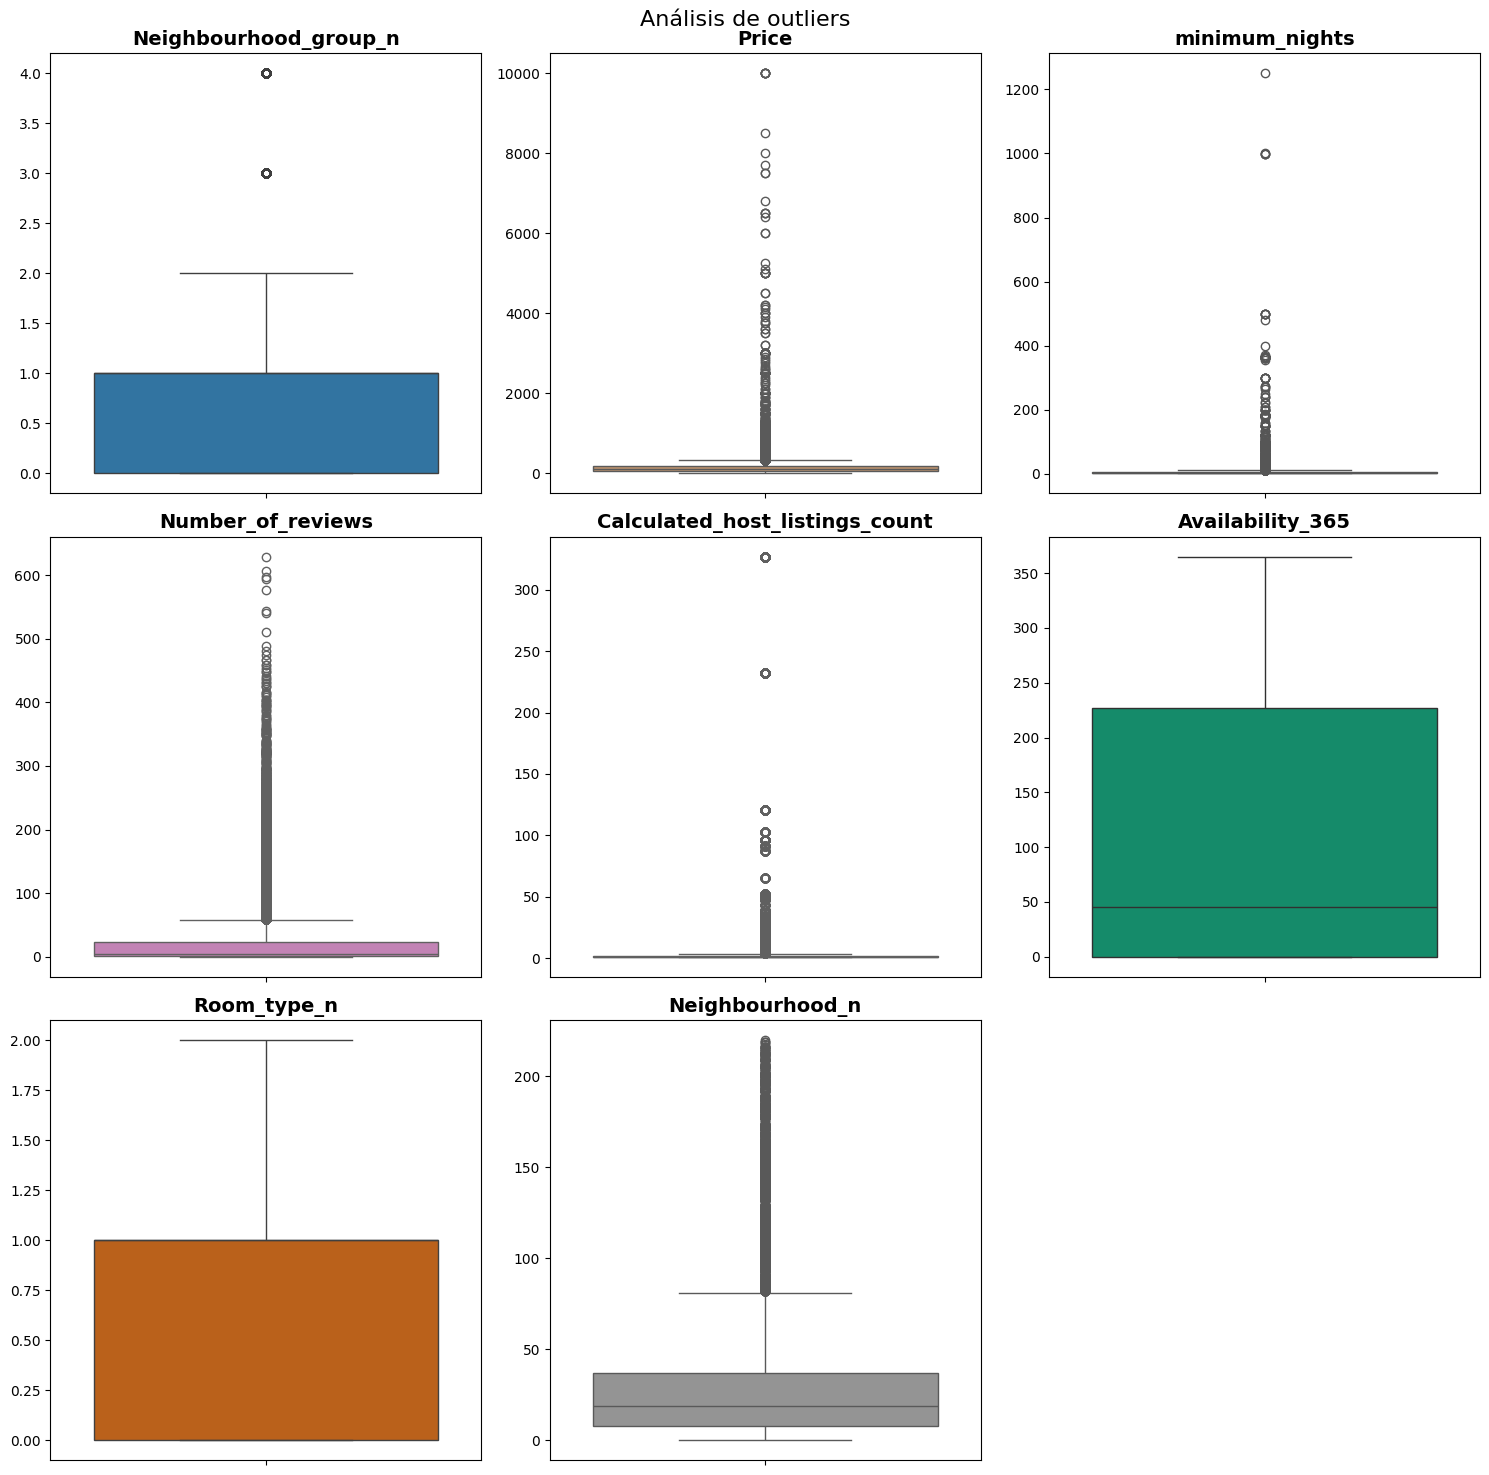

In [17]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group_n").set_title("Neighbourhood_group_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price", color=sns.color_palette("colorblind")[5]).set_title("Price", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights", color=sns.color_palette("colorblind")[8]).set_title("minimum_nights", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews", color=sns.color_palette("colorblind")[4]).set_title("Number_of_reviews", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count", color=sns.color_palette("colorblind")[9]).set_title("Calculated_host_listings_count", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365", color=sns.color_palette("colorblind")[2]).set_title("Availability_365", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type_n", color=sns.color_palette("colorblind")[3]).set_title("Room_type_n", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[2, 1], data = total_data, y = "neighbourhood_n", color=sns.color_palette("colorblind")[7]).set_title("Neighbourhood_n", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

De los gráficos anteriores se puede concluir que en las categorías: number_of_reviews, price, minimum_nights, calculated_host_listing y neighbourhood tienen un número elevado de outliers. 
Esto significa que hay valores que se salen de la media, por lo que hay que tenerlos en cuenta a la hora de sguir con el análisis. 

In [18]:
#Creamos una copia con y otra sin outliers

total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

In [19]:
#Detectar outliers de la columna Price
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [20]:
#Obtenemos los IQR de Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites upper y lower son {round(upper_limit, 2)} y {round(lower_limit, 2)}, el rango de intercuartiles es de {round(price_iqr, 2)}.")

Los límites upper y lower son 334.0 y -90.0, el rango de intercuartiles es de 106.0.


In [ ]:
#Limpiamos los outliers y lo comprobamos 

total_data = total_data[total_data["price"] > 0]

count_0 = total_data[total_data["price"] == 0].shape[0]
count_1 = total_data[total_data["price"] == 1].shape[0]

print("Resultados de 0: ", count_0)
print("Resultados de 1: ", count_1)


Resultados de 0:  0
Resultados de 1:  0


In [22]:
#Ahora hacemos lo mismo con los outliers de Minimum nights

nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [23]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los límites upper y lower son {round(upper_limit, 2)} y {round(lower_limit, 2)}, el rango de intercuartiles es de {round(nights_iqr, 2)}.")

Los límites upper y lower son 11.0 y -5.0, el rango de intercuartiles es de 4.0.


In [ ]:
total_data = total_data[total_data["minimum_nights"] <= 15]

count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Resultados de 0: ", count_0)
print("Resultados de 1: ", count_1)
print("Resultados de 2: ", count_2)
print("Resultados de 3: ", count_3)
print("Resultados de 4: ", count_4)

Resultados de 0:  0
Resultados de 1:  12717
Resultados de 2:  11693
Resultados de 3:  7998
Resultados de 4:  3302


In [25]:
#Mismo caso con el número de reviews

review_stats = total_data["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [ ]:
review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"Los límites upper y lower son {round(upper_limit, 2)} y {round(lower_limit, 2)}, el rango de intercuartiles es de {round(review_iqr, 2)}.")

Los límites upper y lower son 66.0 y -38.0, el rango de intercuartiles es de 26.0.


In [ ]:
#Por último, la lista de anfitriones

hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [28]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los límites upper y lower son {round(upper_limit, 2)} y {round(lower_limit, 2)}, el rango de intercuartiles es de {round(hostlist_iqr, 2)}.")

Los límites upper y lower son 3.5 y -0.5, el rango de intercuartiles es de 1.0.


In [ ]:
count_0 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Resultados de 0: ", count_0)
print("Resultados de 1: ", count_1)
print("Resultados de 2: ", count_2)

Resultados de 0:  40308
Resultados de 1:  30253
Resultados de 2:  6179


In [30]:
total_data = total_data[total_data["calculated_host_listings_count"] > 4]

In [31]:
print(total_data.isnull().sum().sort_values(ascending=False))

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64


In [ ]:
#Análisis de los valores faltantes
print(total_data.isnull().sum().sort_values(ascending=False) / len(total_data))

host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
neighbourhood_group_n             0.0
neighbourhood_n                   0.0
room_type_n                       0.0
dtype: float64


In [ ]:
#Rellenamos los valores faltantes

total_data["availability_365"].fillna(total_data["availability_365"].mean(), inplace = True)
total_data["neighbourhood_n"].fillna(total_data["neighbourhood_n"].mean(), inplace = True)

total_data["host_id"].fillna(total_data["host_id"].median(), inplace = True)
total_data["price"].fillna(total_data["price"].median(), inplace = True)
total_data["number_of_reviews"].fillna(total_data["number_of_reviews"].median(), inplace = True)
total_data["minimum_nights"].fillna(total_data["minimum_nights"].median(), inplace = True)
total_data["calculated_host_listings_count"].fillna(total_data["calculated_host_listings_count"].median(), inplace = True)
total_data["neighbourhood_group_n"].fillna(total_data["neighbourhood_group_n"].median(), inplace = True)
total_data["room_type_n"].fillna(total_data["room_type_n"].median(), inplace = True)

total_data["neighbourhood_group"].fillna(total_data["neighbourhood_group"].mode()[0], inplace = True)
total_data["neighbourhood"].fillna(total_data["neighbourhood"].mode()[0], inplace = True)
total_data["room_type"].fillna(total_data["room_type"].mode()[0], inplace = True)

total_data.isnull().sum()

/tmp/ipykernel_629/1140181478.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data["availability_365"].fillna(total_data["availability_365"].mean(), inplace = True)
/tmp/ipykernel_629/1140181478.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64

In [34]:
#Feature scaling

from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

X_con_outliers = total_data_con_outliers.drop("price", axis = 1)[num_variables]
y_con_outliers = total_data_con_outliers["price"]
X_sin_outliers = total_data_sin_outliers.drop("price", axis = 1)[num_variables]
y_sin_outliers = total_data_sin_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train_con_outliers, y_test_con_outliers = train_test_split(X_con_outliers, y_con_outliers, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers, y_train_sin_outliers, y_test_sin_outliers = train_test_split(X_sin_outliers, y_sin_outliers, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()
X_train_sin_outliers.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0,12,1,3,11,1,1
23615,1,30,0,2,2,1,0
31183,0,6,0,2,0,2,0
29260,0,6,1,3,87,1,267
7275,2,31,0,5,13,1,0


In [35]:
y_train_con_outliers.head()
y_train_sin_outliers.head()

32645    295
23615     70
31183     58
29260     75
7275      38
Name: price, dtype: int64

In [36]:
#Normalización
from sklearn.preprocessing import StandardScaler
from pickle import dump

#Con outliers
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index=X_train_con_outliers.index, columns=num_variables)

X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index=X_test_con_outliers.index, columns=num_variables)

dump(scaler_con_outliers, open("scaler_con_outliers.sav", "wb"))

# Sin outliers
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index=X_train_sin_outliers.index, columns=num_variables)

X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index=X_test_sin_outliers.index, columns=num_variables)

dump(scaler_sin_outliers, open("scaler_sin_outliers.sav", "wb"))

In [ ]:
#Imprimimos los resultados

X_train_con_outliers_norm.head()
X_test_con_outliers_norm.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
879,-0.931915,-0.860512,0.798949,-0.193025,0.868901,-0.186570,0.573058
44383,1.444253,0.409664,-1.050482,0.645248,-0.524396,-0.186570,-0.306765
15394,0.256169,-0.658439,-1.050482,-0.239596,-0.142363,-0.186570,-0.860447
43230,0.256169,0.380797,0.798949,-0.239596,-0.412033,9.640935,1.202586
16332,0.256169,-0.745042,0.798949,-0.239596,0.149780,-0.186570,-0.632906


In [ ]:
X_train_sin_outliers_norm.head()
X_test_sin_outliers_norm.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
879,-0.931915,-0.860512,0.798949,-0.193025,0.868901,-0.186570,0.573058
44383,1.444253,0.409664,-1.050482,0.645248,-0.524396,-0.186570,-0.306765
15394,0.256169,-0.658439,-1.050482,-0.239596,-0.142363,-0.186570,-0.860447
43230,0.256169,0.380797,0.798949,-0.239596,-0.412033,9.640935,1.202586
16332,0.256169,-0.745042,0.798949,-0.239596,0.149780,-0.186570,-0.632906


In [39]:
#Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

# Escalado con outliers
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index=X_train_con_outliers.index, columns=num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index=X_test_con_outliers.index, columns=num_variables)


# Escalado sin outliers
scaler_no_outliers = MinMaxScaler()
scaler_no_outliers.fit(X_train_sin_outliers)

X_train_no_outliers_scal = scaler_no_outliers.transform(X_train_sin_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index=X_train_sin_outliers.index, columns=num_variables)

X_test_no_outliers_scal = scaler_no_outliers.transform(X_test_sin_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index=X_test_sin_outliers.index, columns=num_variables)


In [ ]:
#Imprimimos los resultados

X_train_con_outliers_scal.head()
X_test_con_outliers_scal.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
879,0.00,0.000000,0.5,0.001601,0.098569,0.0,0.517808
44383,0.50,0.200000,0.0,0.016013,0.000000,0.0,0.200000
15394,0.25,0.031818,0.0,0.000801,0.027027,0.0,0.000000
43230,0.25,0.195455,0.5,0.000801,0.007949,1.0,0.745205
16332,0.25,0.018182,0.5,0.000801,0.047695,0.0,0.082192


In [ ]:
X_train_no_outliers_scal.head()
X_test_no_outliers_scal.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
879,0.00,0.000000,0.5,0.001601,0.098569,0.0,0.517808
44383,0.50,0.200000,0.0,0.016013,0.000000,0.0,0.200000
15394,0.25,0.031818,0.0,0.000801,0.027027,0.0,0.000000
43230,0.25,0.195455,0.5,0.000801,0.007949,1.0,0.745205
16332,0.25,0.018182,0.5,0.000801,0.047695,0.0,0.082192


In [42]:
from sklearn.feature_selection import f_classif, SelectKBest

#Con outliers
selection_model_con = SelectKBest(f_classif, k = 7)
selection_model_con.fit(X_train_con_outliers, y_train_con_outliers)
column_names = selection_model_con.get_support()
X_train_sel_con = pd.DataFrame(selection_model_con.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[column_names])
X_test_sel_con = pd.DataFrame(selection_model_con.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[column_names])
dump(selection_model_con, open("selection_model_con_outliers.sav", "wb"))

X_train_sel_con_norm = X_train_con_outliers_norm[X_train_sel_con.columns]
X_train_sel_con_scal = X_train_con_outliers_scal[X_train_sel_con.columns]

X_test_sel_con_norm = X_test_con_outliers_norm[X_test_sel_con.columns]
X_test_sel_con_scal = X_test_con_outliers_scal[X_test_sel_con.columns]

#Sin outliers
selection_model_con = SelectKBest(f_classif, k = 7)
selection_model_con.fit(X_train_sin_outliers, y_train_sin_outliers)
column_names = selection_model_con.get_support()
X_train_sel_con = pd.DataFrame(selection_model_con.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[column_names])
X_test_sel_con = pd.DataFrame(selection_model_con.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[column_names])
dump(selection_model_con, open("selection_model_con_outliers.sav", "wb"))

X_train_sel_sin_norm = X_train_sin_outliers_norm[X_train_sel_con.columns]
X_train_sel_sin_scal = X_train_no_outliers_scal[X_train_sel_con.columns]

X_test_sel_sin_norm = X_test_sin_outliers_norm[X_test_sel_con.columns]
X_test_sel_sin_scal = X_test_no_outliers_scal[X_test_sel_con.columns]


In [43]:
#Imprimimos los resultados de entrenamiento con outliers

X_train_sel_con_norm.head()
X_train_sel_con_scal.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0.00,0.054545,0.5,0.001601,0.017488,0.000000,0.002740
23615,0.25,0.136364,0.0,0.000801,0.003180,0.000000,0.000000
31183,0.00,0.027273,0.0,0.000801,0.000000,0.003067,0.000000
29260,0.00,0.027273,0.5,0.001601,0.138315,0.000000,0.731507
7275,0.50,0.140909,0.0,0.003203,0.020668,0.000000,0.000000


In [ ]:
#Imprimimos los resultados de evaluación con outliers

X_test_sel_con_norm.head()
X_test_sel_con_scal.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
879,0.00,0.000000,0.5,0.001601,0.098569,0.0,0.517808
44383,0.50,0.200000,0.0,0.016013,0.000000,0.0,0.200000
15394,0.25,0.031818,0.0,0.000801,0.027027,0.0,0.000000
43230,0.25,0.195455,0.5,0.000801,0.007949,1.0,0.745205
16332,0.25,0.018182,0.5,0.000801,0.047695,0.0,0.082192


In [ ]:
#Imprimimos los resultados de entrenamiento sin outliers
X_train_sel_sin_norm.head()
X_train_sel_sin_scal.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0.00,0.054545,0.5,0.001601,0.017488,0.000000,0.002740
23615,0.25,0.136364,0.0,0.000801,0.003180,0.000000,0.000000
31183,0.00,0.027273,0.0,0.000801,0.000000,0.003067,0.000000
29260,0.00,0.027273,0.5,0.001601,0.138315,0.000000,0.731507
7275,0.50,0.140909,0.0,0.003203,0.020668,0.000000,0.000000


In [ ]:
#Imprimimos los resultados de evaluación sin outliers
X_test_sel_sin_norm.head()
X_test_sel_sin_scal.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
879,0.00,0.000000,0.5,0.001601,0.098569,0.0,0.517808
44383,0.50,0.200000,0.0,0.016013,0.000000,0.0,0.200000
15394,0.25,0.031818,0.0,0.000801,0.027027,0.0,0.000000
43230,0.25,0.195455,0.5,0.000801,0.007949,1.0,0.745205
16332,0.25,0.018182,0.5,0.000801,0.047695,0.0,0.082192


In [47]:
X_train_sel_con_norm["price"] = list(y_train_con_outliers)
X_test_sel_con_norm["price"] = list(y_test_con_outliers)

In [48]:
X_train_sel_con_scal["price"] = list(y_train_con_outliers)
X_test_sel_con_scal["price"] = list(y_test_con_outliers)

In [49]:
X_train_sel_sin_norm["price"] = list(y_train_sin_outliers)
X_test_sel_sin_norm["price"] = list(y_test_sin_outliers) 

In [50]:
X_train_sel_sin_scal["price"] = list(y_train_sin_outliers)  
X_test_sel_sin_scal["price"] = list(y_test_sin_outliers) 

In [51]:
#Guardamos los datos originales con outliers
X_train_con_outliers.to_csv("../data/processed/clean_train_orig_con.csv", index = False)
X_test_con_outliers.to_csv("../data/processed/clean_test_orig_con.csv", index = False)

In [52]:
#Guardamos los datos originales sin outliers
X_train_sin_outliers.to_csv("../data/processed/clean_train_orig_sin.csv", index = False)
X_test_sin_outliers.to_csv("../data/processed/clean_test_orig_sin.csv", index = False)

In [53]:
#Guardamos los datos normalizados con outliers
X_train_sel_con_norm.to_csv("../data/processed/clean_train_norm_con.csv", index = False)
X_test_sel_con_norm.to_csv("../data/processed/clean_test_norm_con.csv", index = False)

In [54]:
#Guardamos los datos normalizados sin outliers
X_train_sel_sin_norm.to_csv("../data/processed/clean_train_norm_sin.csv", index = False)
X_test_sel_sin_norm.to_csv("../data/processed/clean_test_norm_sin.csv", index = False)

In [55]:
#Guardamos los datos escalados con outliers
X_train_sel_con_scal.to_csv("../data/processed/clean_train_scal_con.csv", index = False)
X_test_sel_con_scal.to_csv("../data/processed/clean_test_scal_con.csv", index = False)

In [56]:
#Guardamos los datos escalados sin outliers
X_train_sel_sin_scal.to_csv("../data/processed/clean_train_scal_sin.csv", index = False)
X_test_sel_sin_scal.to_csv("../data/processed/clean_test_scal_sin.csv", index = False)

In [57]:
#Guardamos los datos y de entrenamiento y test
y_train_con_outliers.to_csv("../data/processed/clean_train_y.csv", index = False)
y_test_con_outliers.to_csv("../data/processed/clean_test_y.csv", index = False)
